### Importing libraries needed for Unsupervised Learning

In [10]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
negative_data = pd.read_csv('negative.csv')


In [6]:
negative_data.head()


,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.00,15.60,26.3,1.07,0.411,-15.70,2.06,3.150,...,23.50,20.3,20.3,23.50,-215.00,280.0,-162.0,-162.0,280.0,NEGATIVE
1,17.80,27.8,-102.00,16.90,26.9,-3.21,-1.950,9.80,-3.24,-0.955,...,-177.00,32.8,32.8,-177.00,-417.00,384.0,-186.0,-186.0,384.0,NEGATIVE
2,8.91,29.2,-314.00,6.51,30.9,-1.88,1.900,11.90,-3.60,5.700,...,226.00,-81.8,-81.8,226.00,1.84,99.4,-40.3,-40.3,99.4,NEGATIVE
3,13.30,30.4,-149.00,11.80,28.3,3.03,0.895,-4.52,1.72,-0.633,...,6.11,20.0,20.0,6.11,-53.00,176.0,-167.0,-167.0,176.0,NEGATIVE
4,19.30,31.7,-4.56,23.80,32.9,-3.41,0.677,46.60,6.80,3.890,...,244.00,-144.0,-144.0,244.00,18.50,-14.8,10.3,10.3,-14.8,NEGATIVE


In [7]:
negative = negative_data.drop(columns=['label'])

### Standardize the data

In [11]:
scaler = StandardScaler()
negative_scaled = scaler.fit_transform(negative)

### Dimentionality Reduction

In [15]:
pca = PCA()
pca.fit(negative_scaled)
data_pca = pca.transform(negative_scaled)

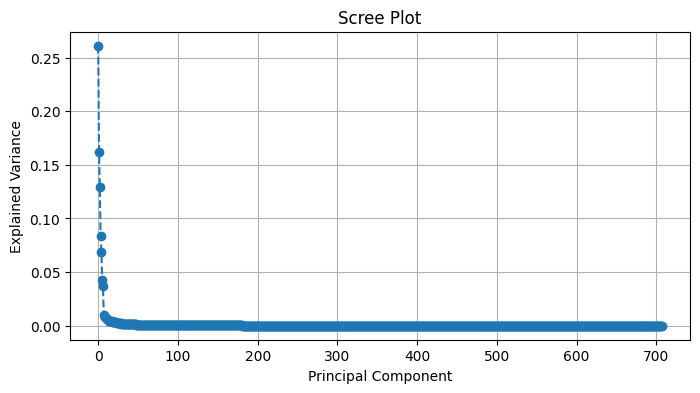

In [16]:
# Scree plot
plt.figure(figsize=(8, 4))
plt.plot(pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.grid(True)
plt.show()

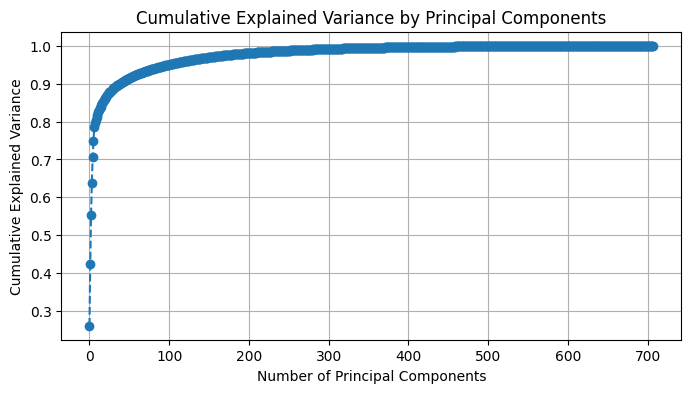

In [17]:
# Plot the explained variance
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [26]:
# Apply PCA
n_components = 10  # You can adjust the number of components as needed
pca = PCA(n_components=n_components)

# Fit and transform the data
negative_pca = pca.fit_transform(negative_scaled)

# Create a DataFrame with the PCA components
pca_columns = [f'PC{i+1}' for i in range(n_components)]
negative_pca_df = pd.DataFrame(negative_pca, columns=pca_columns)

# Inspect the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance ratio by each component: {explained_variance_ratio}")
print(f"Cumulative explained variance ratio: {np.cumsum(explained_variance_ratio)}")

# Show the DataFrame with PCA components
print(negative_pca_df.head())

Explained variance ratio by each component: [0.26113021 0.16228194 0.12982476 0.08394001 0.06917878 0.0424364
 0.03661305 0.00953428 0.00827422 0.00801001]
Cumulative explained variance ratio: [0.26113021 0.42341215 0.55323691 0.63717692 0.7063557  0.7487921
 0.78540515 0.79493943 0.80321365 0.81122367]
         PC1        PC2        PC3       PC4       PC5       PC6       PC7  \
0  -3.860352  -7.572855 -22.662785  0.434914  0.432507  0.613516  0.030958   
1  22.207870   2.624527 -32.490167 -0.158417  0.195524  1.295060 -0.963311   
2  -0.535370 -11.849649   5.704524 -2.626988 -1.294618 -1.469437 -1.155138   
3  18.912066  -3.286446  -8.292203 -3.007091 -2.148028  0.266393 -1.446832   
4  36.713127  29.282152  22.719028 -7.937215  4.327670  0.074509  7.857634   

        PC8       PC9       PC10  
0  0.380263  1.264601  -1.934083  
1 -2.339682 -1.248535   5.431330  
2 -0.298293  0.050429  -7.419478  
3  0.678001 -0.396857  -1.699126  
4 -3.982499  2.526692  11.001573  


### Apply K-means clustering

In [27]:
# Initialize variables for tracking best results
best_kmeans = None
best_inertia = float('inf')  # Initialize with a large value

# Perform multiple initializations of K-means clustering
n_init = 100  # Number of initializations
for i in range(n_init):
    kmeans = KMeans(n_clusters=4, random_state=i)
    kmeans.fit(negative_pca)
    
    # Calculate inertia (distortion) and update best results if better
    inertia = kmeans.inertia_
    if inertia < best_inertia:
        best_inertia = inertia
        best_kmeans = kmeans

# Get the best clustering results
cluster_labels = best_kmeans.labels_

In [28]:
# Add cluster labels to the original DataFrame
negative_pca_df = pd.DataFrame(negative_pca, columns=[f'PC{i+1}' for i in range(n_components)])
negative_pca_df['Cluster'] = cluster_labels


### Visualization of Clusters

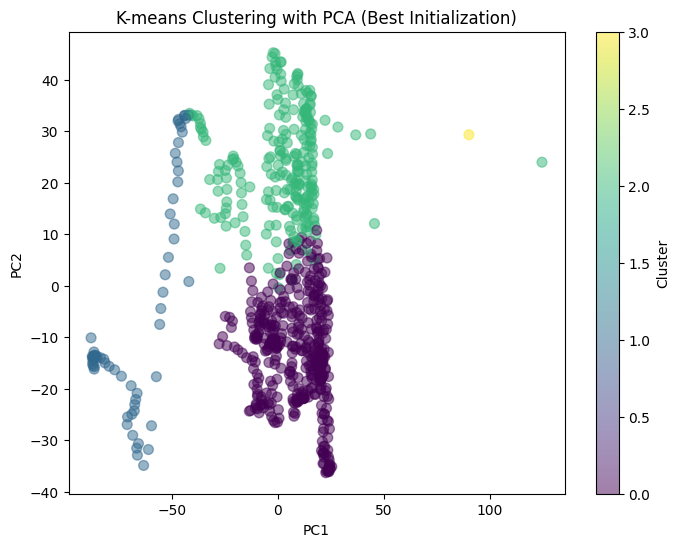

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(negative_pca_df['PC1'], negative_pca_df['PC2'], c=negative_pca_df['Cluster'], cmap='viridis', s=50, alpha=0.5)
plt.title('K-means Clustering with PCA (Best Initialization)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()
